#### Notebook to create plots for doctoral thesis 

Coded in a way, that only first cell needs to be edited. Rest should be atomated.
Does calculations for a specific boundary condition and different parameter configurations: LFF and two MHS solutions. 
Need to edit:
- path to boundary condition data
- path to folder where plots are saved
- value choices for alpha and a


In [1]:
%load_ext autoreload
%autoreload 2

In [21]:
from __future__ import annotations
import numpy as np

from mflex.simulate.simulate_boundary import dalmatian

from mhsflex.field2d import Field2dData
from mhsflex.field3d import Field3dData, calculate_magfield
from mhsflex.vis import plot, plot_plasma_parameters
from mhsflex.metrics import compare_field3d

from matplotlib import rc, colors
import matplotlib.pyplot as plt


rc("font", **{"family": "serif", "serif": ["Times"]})
rc("text", usetex=True)

c4 = (1.000, 0.224, 0.376)
c1 = (0.439, 0.788, 1.000)
c3 = "black"
c2 = (0.420, 0.502, 1.000)

cmap = colors.LinearSegmentedColormap.from_list(
    "cmap",
    (
        (0.000, (0.000, 0.000, 0.000)),
        (0.500, (0.659, 0.659, 0.659)),
        (1.000, (1.000, 1.000, 1.000)),
    ),
)

cmap2 = colors.LinearSegmentedColormap.from_list(
    "cmap2", ((0.000, (0.984, 1.000, 0.000)), (1.000, (1.000, 0.988, 0.761)))
)

### For example from analytical expression

In [22]:
nresol_x = 200
nresol_y = 200
nresol_z = 400
xmin = 0.0
xmax = 2.0  # in units of 10^4 km, therefore corresponds to 20Mm
ymin = 0.0
ymax = 2.0
zmin = 0.0
zmax = 2.0
pixelsize_x = (xmax - xmin) / nresol_x
pixelsize_y = (ymax - ymin) / nresol_y
pixelsize_z = (zmax - zmin) / nresol_z

z0 = 0.2
deltaz = 0.02

z_arr = np.arange(nresol_z) * (zmax - zmin) / (nresol_z - 1) + zmin
x_arr = np.arange(nresol_x) * (xmax - xmin) / (nresol_x - 1) + xmin
y_arr = np.arange(nresol_y) * (ymax - ymin) / (nresol_y - 1) + ymin
B_PHOTO = 500
data_bz = np.zeros((nresol_y, nresol_x))

for ix in range(0, nresol_x):
    for iy in range(0, nresol_y):
        x = x_arr[ix]
        y = y_arr[iy]
        data_bz[iy, ix] = dalmatian(x, y) * B_PHOTO

data2d = Field2dData(nresol_x, nresol_y, nresol_z, nresol_x, pixelsize_x, pixelsize_y, pixelsize_z, x_arr, y_arr, z_arr, data_bz)

### SDO Example

In [ ]:
path = (
    "/Users/lilli/Desktop/SOAR/obs/solo_L2_phi-hrt-blos_20220307T000609_V01.fits"
)
data2d = Field2dData.from_fits_SDO(path)

z0 = 2.0
deltaz = 0.2


### SOAR Example

In [ ]:
path = (
    "/Users/lilli/Desktop/SOAR/obs/solo_L2_phi-hrt-blos_20220307T000609_V01.fits"
)
data2d = Field2dData.from_fits_SolOr(path)

z0 = 2.0
deltaz = 0.2

### Independent from here

In [23]:
# Background atmosphere parameters
b = 1.0

alphapot = 0.0
alpha = 0.5

alff = 0.0
amhs1 = 0.22
amhs2 = 0.44

# data3d = calculate_magfield(data2d, amhs2, b, alpha, z0, deltaz)

In [24]:
# Calculate magnetic field data
data3dpot = calculate_magfield(data2d, alff, b, alphapot, z0, deltaz)
data3dlff = calculate_magfield(data2d, alff, b, alpha, z0, deltaz)
data3dmhs1 = calculate_magfield(data2d, amhs1, b, alpha, z0, deltaz)
data3dmhs2 = calculate_magfield(data2d, amhs2, b, alpha, z0, deltaz)

In [28]:
path2saveP = "/Users/lilli/Desktop/mflex/multipole/P"
path2saveLFF = "/Users/lilli/Desktop/mflex/multipole/LFF"
path2saveMHS2 = "/Users/lilli/Desktop/mflex/multipole/MHS2"
path2saveMHS1 = "/Users/lilli/Desktop/mflex/multipole/MHS1"

data3dpot.save(path2saveP)
data3dlff.save(path2saveLFF)
data3dmhs1.save(path2saveMHS1)
data3dmhs2.save(path2saveMHS2)

In [ ]:
data3dlffrecon = Field3dData.load(path2save)

In [29]:
folder = "/Users/lilli/Desktop/mflex/multipole/plots"

In [ ]:
plot(data3dlffrecon, "los", False, True, path=folder)
plot(data3dlffrecon, "side", False, True, path=folder)
plot(data3dlffrecon, "angular", False, True, path=folder)

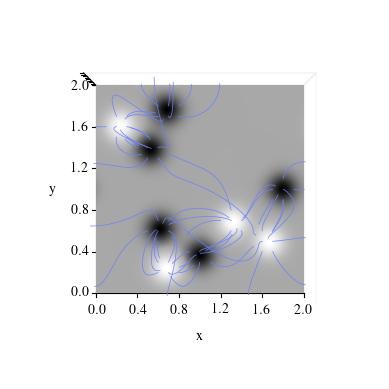

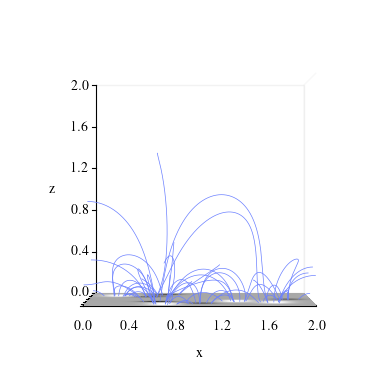

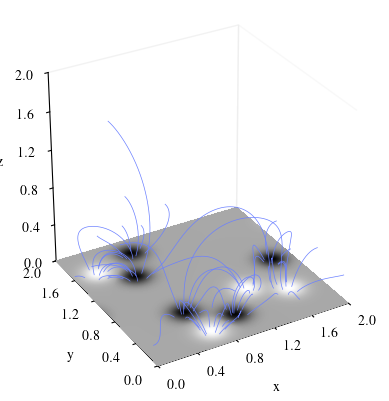

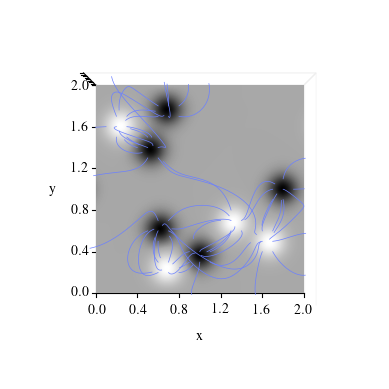

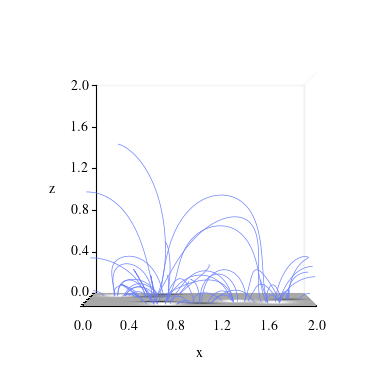

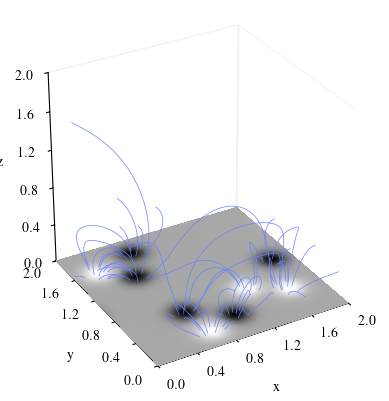

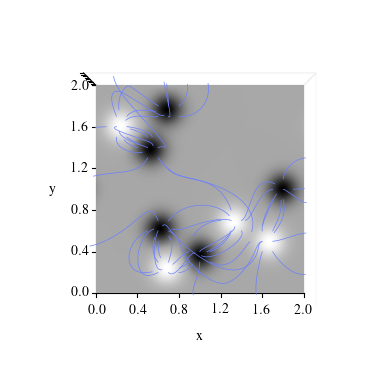

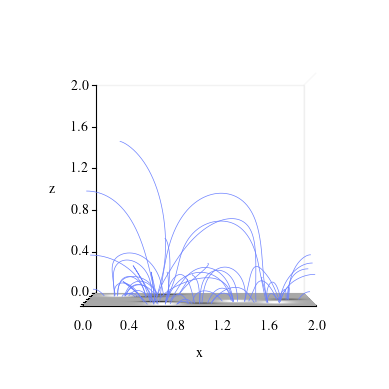

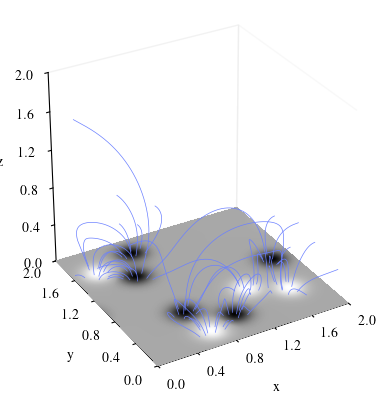

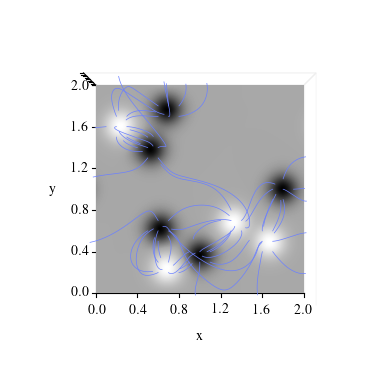

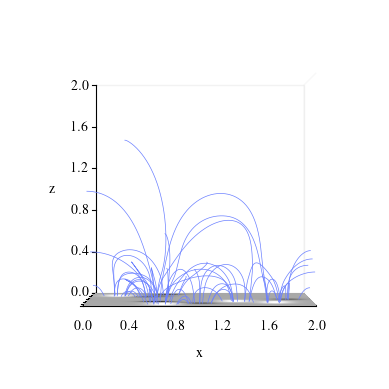

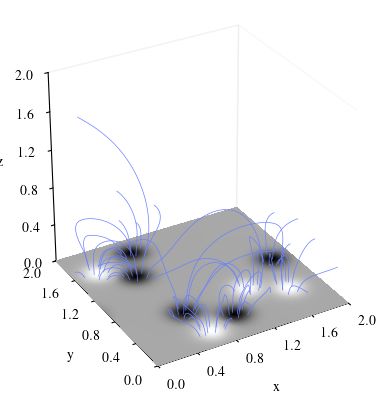

In [30]:
# Plot field lines

plot(data3dpot, "los", False, True, path=folder)
plot(data3dpot, "side", False,True,path=folder)
plot(data3dpot, "angular", False,True,path=folder)

plot(data3dlff, "los", False, True, path=folder)
plot(data3dlff, "side", False,True,path=folder)
plot(data3dlff, "angular", False,True,path=folder)

plot(data3dmhs1,"los", False,True,path=folder)
plot(data3dmhs1,"side", False,True,path=folder)
plot(data3dmhs1, "angular", False,True,path=folder)

plot(data3dmhs2, "los", False,True,path=folder)
plot(data3dmhs2, "side", False,True,path=folder)
plot(data3dmhs2, "angular", False,True,path=folder)

In [26]:
data3dpot_2F1 = calculate_magfield(data2d, alff, b, alphapot, z0, deltaz, asymptotic=False)
data3dlff_2F1 = calculate_magfield(data2d, alff, b, alpha, z0, deltaz, asymptotic=False)
data3dmhs1_2F1 = calculate_magfield(data2d, amhs1, b, alpha, z0, deltaz, asymptotic=False)
data3dmhs2_2F1 = calculate_magfield(data2d, amhs2, b, alpha, z0, deltaz, asymptotic=False)

In [31]:
path2saveP_2F1 = "/Users/lilli/Desktop/mflex/multipole/P_2F1"
path2saveLFF_2F1 = "/Users/lilli/Desktop/mflex/multipole/LFF_2F1"
path2saveMHS2_2F1 = "/Users/lilli/Desktop/mflex/multipole/MHS2_2F1"
path2saveMHS1_2F1 = "/Users/lilli/Desktop/mflex/multipole/MHS1_2F1"

data3dpot_2F1.save(path2saveP_2F1)
data3dlff_2F1.save(path2saveLFF_2F1)
data3dmhs1_2F1.save(path2saveMHS1_2F1)
data3dmhs2_2F1.save(path2saveMHS2_2F1)

In [32]:
folder2 = "/Users/lilli/Desktop/mflex/multipole/plots_2F1"

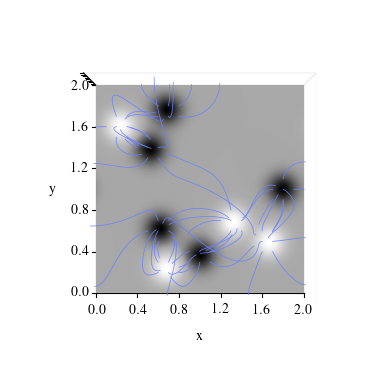

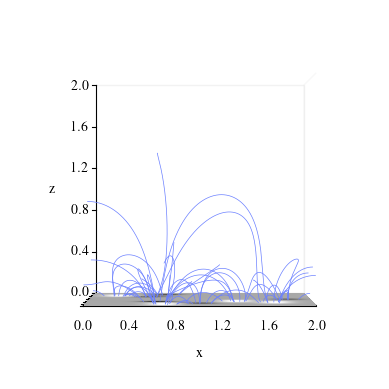

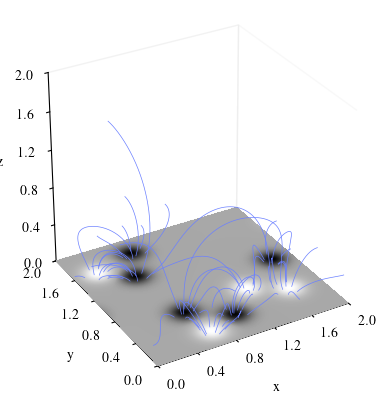

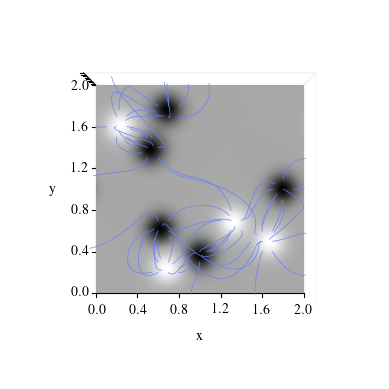

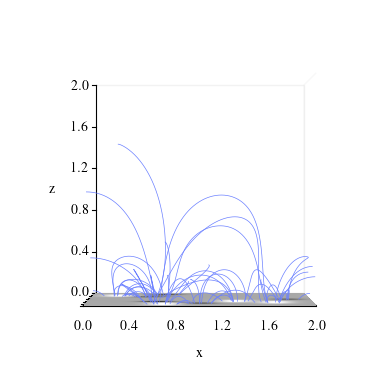

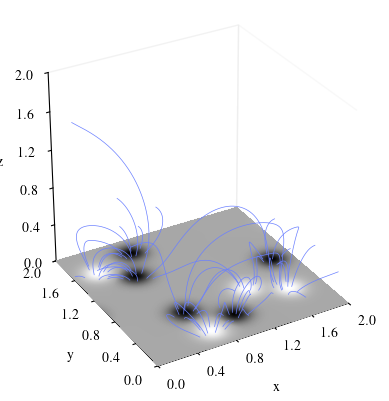

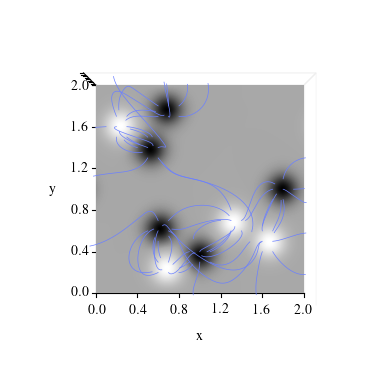

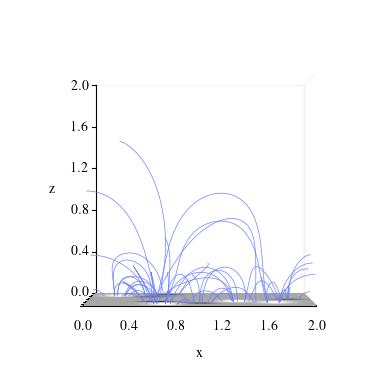

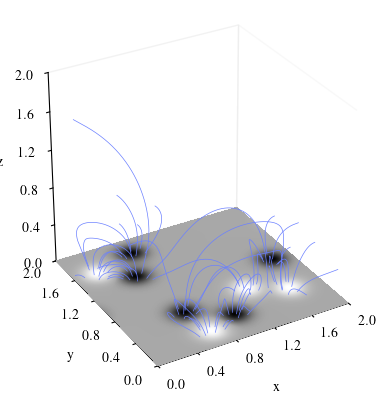

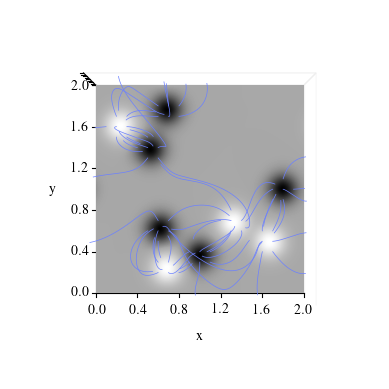

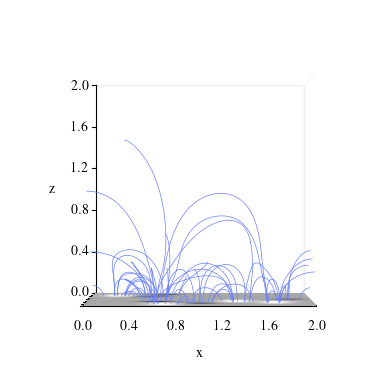

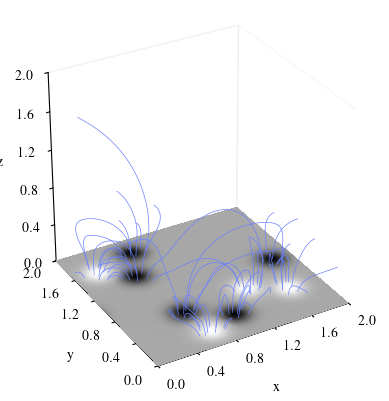

In [33]:
plot(data3dpot_2F1, "los", False, True, path=folder2)
plot(data3dpot_2F1, "side", False,True,path=folder2)
plot(data3dpot_2F1, "angular", False,True,path=folder2)

plot(data3dlff_2F1, "los", False, True, path=folder2)
plot(data3dlff_2F1, "side", False,True,path=folder2)
plot(data3dlff_2F1, "angular", False,True,path=folder2)

plot(data3dmhs1_2F1,"los", False,True,path=folder2)
plot(data3dmhs1_2F1,"side", False,True,path=folder2)
plot(data3dmhs1_2F1, "angular", False,True,path=folder2)

plot(data3dmhs2_2F1, "los", False,True,path=folder2)
plot(data3dmhs2_2F1, "side", False,True,path=folder2)
plot(data3dmhs2_2F1, "angular", False,True,path=folder2)

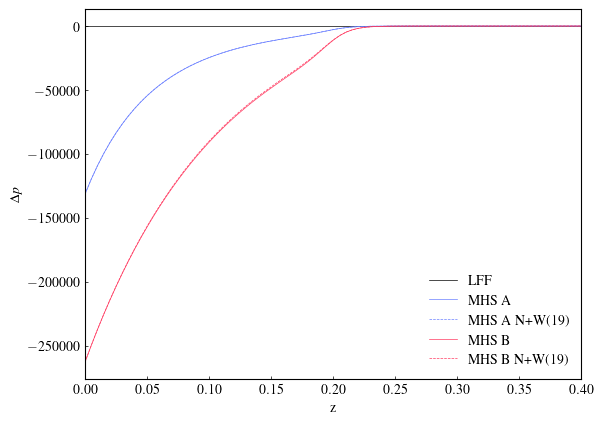

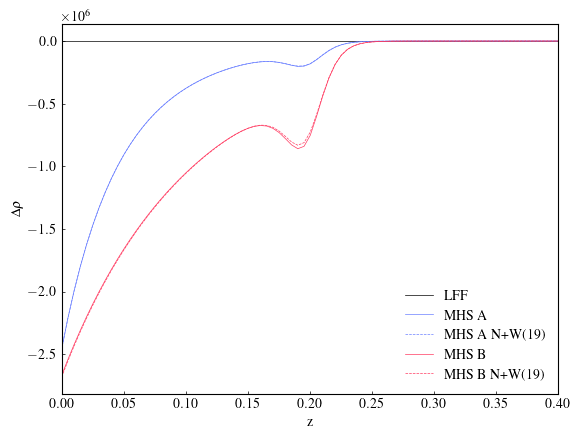

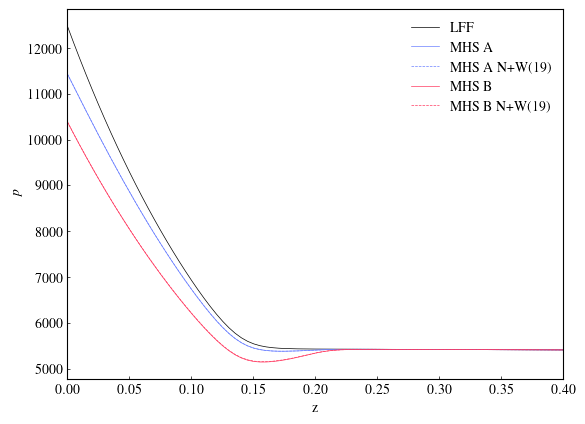

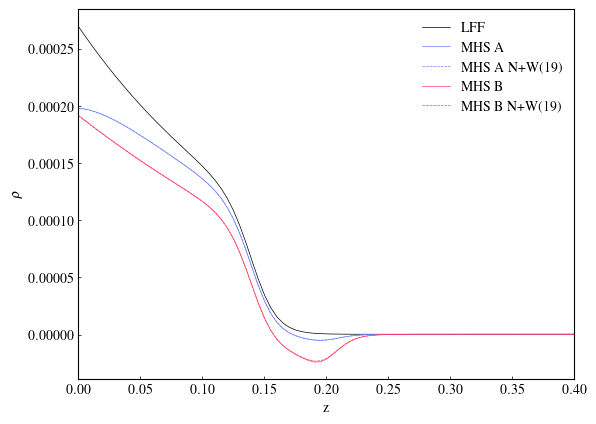

In [27]:
# Plot pressure and density where Bz is maximal on the photopshere
folder3 = "/Users/lilli/Desktop/mflex/multipole"
ix_max = np.unravel_index(data3dlff.bz.argmax(), data3dlff.bz.shape)[1]
iy_max = np.unravel_index(data3dlff.bz.argmax(), data3dlff.bz.shape)[0]

plt.plot(
    data3dlff.z,
    data3dlff.dpressure[iy_max, ix_max, :],
    linewidth=0.5,
    linestyle="solid",
    color=c3,
    label="LFF",
)
plt.plot(
    data3dmhs1.z,
    data3dmhs1.dpressure[iy_max, ix_max, :],
    linewidth=0.5,
    linestyle="solid",
    color=c2,
    label="MHS A",
)
plt.plot(
    data3dmhs1_2F1.z,
    data3dmhs1_2F1.dpressure[iy_max, ix_max, :],
    linewidth=0.5,
    linestyle="dashed",
    color=c2,
    label="MHS A N+W(19)",
)
plt.plot(
    data3dmhs2.z,
    data3dmhs2.dpressure[iy_max, ix_max, :],
    linewidth=0.5,
    linestyle="solid",
    color=c4,
    label="MHS B",
)
plt.plot(
    data3dmhs2_2F1.z,
    data3dmhs2_2F1.dpressure[iy_max, ix_max, :],
    linewidth=0.5,
    linestyle="dashed",
    color=c4,
    label="MHS B N+W(19)",
)
plt.ylabel(r"$\Delta p$")
plt.xlabel("z")
plt.xlim([0, 2*z0])
plt.legend(frameon=False)
plt.tick_params(direction="in", length=2, width=0.5)
plotname = folder3 + "/dpres.png"
plt.savefig(plotname, dpi=600, bbox_inches="tight", pad_inches=0.1)
plt.show()

plt.plot(
    data3dlff.z,
    data3dlff.ddensity[iy_max, ix_max, :],
    linewidth=0.5,
    linestyle="solid",
    color=c3,
    label="LFF",
)
plt.plot(
    data3dmhs1.z,
    data3dmhs1.ddensity[iy_max, ix_max, :],
    linewidth=0.5,
    linestyle="solid",
    color=c2,
    label="MHS A",
)
plt.plot(
    data3dmhs1_2F1.z,
    data3dmhs1_2F1.ddensity[iy_max, ix_max, :],
    linewidth=0.5,
    linestyle="dashed",
    color=c2,
    label="MHS A N+W(19)",
)
plt.plot(
    data3dmhs2.z,
    data3dmhs2.ddensity[iy_max, ix_max, :],
    linewidth=0.5,
    linestyle="solid",
    color=c4,
    label="MHS B",
)
plt.plot(
    data3dmhs2_2F1.z,
    data3dmhs2_2F1.ddensity[iy_max, ix_max, :],
    linewidth=0.5,
    linestyle="dashed",
    color=c4,
    label="MHS B N+W(19)",
)
plt.ylabel(r"$\Delta \rho$")
plt.xlabel("z")
plt.legend(frameon=False)
plt.xlim([0, 2*z0])
plt.tick_params(direction="in", length=2, width=0.5)
plotname = folder3 + "/dden.png"
plt.savefig(plotname, dpi=600, bbox_inches="tight", pad_inches=0.1)
plt.show()

plt.plot(
    data3dlff.z,
    data3dlff.fpressure[iy_max, ix_max, :],
    linewidth=0.5,
    linestyle="solid",
    color=c3,
    label="LFF",
)
plt.plot(
    data3dmhs1.z,
    data3dmhs1.fpressure[iy_max, ix_max, :],
    linewidth=0.5,
    linestyle="solid",
    color=c2,
    label="MHS A",
)
plt.plot(
    data3dmhs1_2F1.z,
    data3dmhs1_2F1.fpressure[iy_max, ix_max, :],
    linewidth=0.5,
    linestyle="dashed",
    color=c2,
    label="MHS A N+W(19)",
)
plt.plot(
    data3dmhs2.z,
    data3dmhs2.fpressure[iy_max, ix_max, :],
    linewidth=0.5,
    linestyle="solid",
    color=c4,
    label="MHS B",
)
plt.plot(
    data3dmhs2_2F1.z,
    data3dmhs2_2F1.fpressure[iy_max, ix_max, :],
    linewidth=0.5,
    linestyle="dashed",
    color=c4,
    label="MHS B N+W(19)",
)
plt.ylabel(r"$p$")
plt.xlabel("z")
plt.legend(frameon=False)
plt.xlim([0, 2*z0])
plt.tick_params(direction="in", length=2, width=0.5)
plotname = folder3 + "/fpres.png"
plt.savefig(plotname, dpi=600, bbox_inches="tight", pad_inches=0.1)
plt.show()

plt.plot(
    data3dlff.z,
    data3dlff.fdensity[iy_max, ix_max, :],
    linewidth=0.5,
    linestyle="solid",
    color=c3,
    label="LFF",
)
plt.plot(
    data3dmhs1.z,
    data3dmhs1.fdensity[iy_max, ix_max, :],
    linewidth=0.5,
    linestyle="solid",
    color=c2,
    label="MHS A",
)
plt.plot(
    data3dmhs1_2F1.z,
    data3dmhs1_2F1.fdensity[iy_max, ix_max, :],
    linewidth=0.5,
    linestyle="dashed",
    color=c2,
    label="MHS A N+W(19)",
)
plt.plot(
    data3dmhs2.z,
    data3dmhs2.fdensity[iy_max, ix_max, :],
    linewidth=0.5,
    linestyle="solid",
    color=c4,
    label="MHS B",
)
plt.plot(
    data3dmhs2_2F1.z,
    data3dmhs2_2F1.fdensity[iy_max, ix_max, :],
    linewidth=0.5,
    linestyle="dashed",
    color=c4,
    label="MHS B N+W(19)",
)
plt.ylabel(r"$\rho$")
plt.xlabel("z")
plt.legend(frameon=False)
plt.xlim([0, 2*z0])
plt.tick_params(direction="in", length=2, width=0.5)
plotname = folder3 + "/fden.png"
plt.savefig(plotname, dpi=600, bbox_inches="tight", pad_inches=0.1)
plt.show()

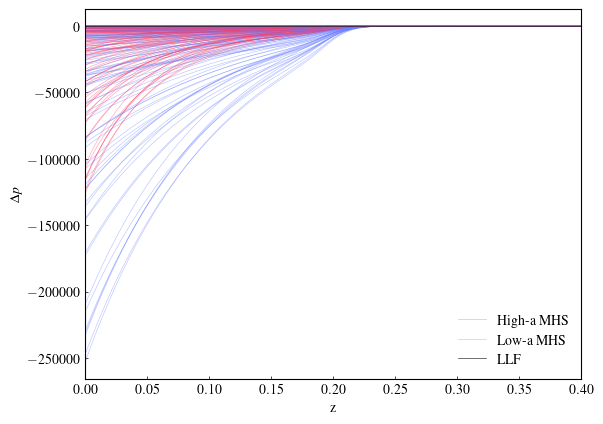

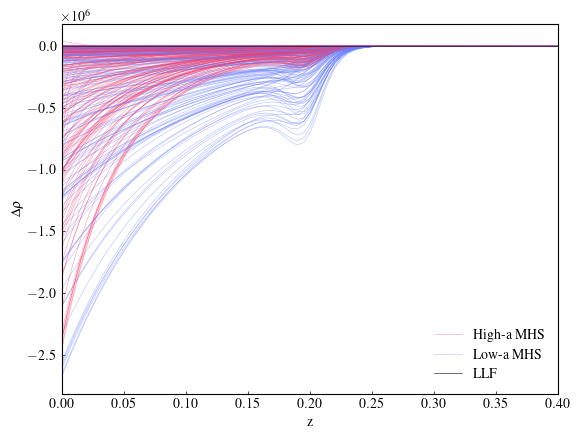

In [34]:
plt.plot(
    data3dmhs1_2F1.z,
    data3dmhs1_2F1.dpressure[0, 0, :],
    linewidth=0.4,
    linestyle="solid",
    color=c4,
    alpha=0.5,
    label="High-a MHS",
)
plt.plot(
    data3dmhs1_2F1.z,
    data3dmhs2_2F1.dpressure[0, 0, :],
    linewidth=0.4,
    linestyle="solid",
    color=c2,
    alpha=0.5,
    label="Low-a MHS",
)
for ix in range(0, data3dmhs1.nx, 12):
    for iy in range(0, data3dmhs1.ny, 12):
        plt.plot(
            data3dmhs1_2F1.z,
            data3dmhs1_2F1.dpressure[iy, ix, :],
            linewidth=0.4,
            linestyle="solid",
            color=c4,
            alpha=0.5,
        )
        plt.plot(
            data3dmhs1_2F1.z,
            data3dmhs2_2F1.dpressure[iy, ix, :],
            linewidth=0.4,
            linestyle="solid",
            color=c2,
            alpha=0.5,
        )
plt.plot(
    data3dmhs1.z,
    data3dlff_2F1.dpressure[0, 0, :],
    linewidth=0.4,
    linestyle="solid",
    color="black",
    label="LLF",
)
plt.xlim([0, 2 * z0])
plt.ylabel(r"$\Delta p$")
plt.xlabel("z")
plt.legend(frameon=False)
plt.tick_params(direction="in", length=2, width=0.5)
plotname = folder2 + "/dpres.png"
plt.savefig(plotname, dpi=600, bbox_inches="tight", pad_inches=0.1)
plt.show()


plt.plot(
    data3dmhs1.z,
    data3dmhs1_2F1.ddensity[0, 0, :],
    linewidth=0.4,
    linestyle="solid",
    color=c4,
    alpha=0.5,
    label="High-a MHS",
)
plt.plot(
    data3dmhs1.z,
    data3dmhs2_2F1.ddensity[0, 0, :],
    linewidth=0.4,
    linestyle="solid",
    color=c2,
    alpha=0.5,
    label="Low-a MHS",
)
for ix in range(0, data3dmhs1.nx, 12):
    for iy in range(0, data3dmhs1.ny, 12):
        plt.plot(
            data3dmhs1.z,
            data3dmhs1_2F1.ddensity[iy, ix, :],
            linewidth=0.4,
            linestyle="solid",
            color=c4,
            alpha=0.5,
        )
        plt.plot(
            data3dmhs1.z,
            data3dmhs2_2F1.ddensity[iy, ix, :],
            linewidth=0.4,
            linestyle="solid",
            color=c2,
            alpha=0.5,
        )
plt.plot(
    data3dmhs1.z,
    data3dlff_2F1.ddensity[iy_max, ix_max, :],
    linewidth=0.4,
    linestyle="solid",
    color="black",
    label="LLF",
)
plt.xlim([0, 2 * z0])
plt.ylabel(r"$\Delta \rho$")
plt.xlabel("z")
plt.legend(frameon=False)
plt.tick_params(direction="in", length=2, width=0.5)
plotname = folder2 + "/dden.png"
plt.savefig(plotname, dpi=600, bbox_inches="tight", pad_inches=0.1)
plt.show()

In [ ]:
# Metric comparisons to LFF field

compare_field3d(data3dlff, data3dmhs1)

In [ ]:
compare_field3d(data3dlff, data3dmhs2)

In [ ]:
compare_field3d(data3dmhs1, data3dmhs2)